<a href="https://colab.research.google.com/github/syuan9887/DeepLearning_ImageClassification/blob/main/Plankton_Preprocessed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Link to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Create CSV File for train and test data

In [2]:
!unzip -qq "/content/drive/MyDrive/110_1/DeepLearning/Final/datasciencebowl.zip"

## Train Set


In [3]:
!unzip -qq "/content/train.zip"

In [4]:
###Create DataFame for All Training Data
import os

images_cat = []
images_indx = []
images_Big_Category = []
cat_indx = []
cnt = -1
for root, dirs, files in os.walk('/content/train/'):
  for name in files:
    cat = root.split('/')[-1] ##get the category of each photo
    if cat in images_cat:
      cat_indx.append(cnt)
    else:
      cnt+=1
      cat_indx.append(cnt)     
    images_indx.append(name)
    images_cat.append(cat)

import pandas as pd
train_df = pd.DataFrame({'filename':images_indx,'images_category':images_cat,'label':cat_indx})
train_df

,filename,images_category,label
0,52181.jpg,tunicate_salp_chains,0
1,154438.jpg,tunicate_salp_chains,0
2,147455.jpg,tunicate_salp_chains,0
3,58039.jpg,tunicate_salp_chains,0
4,46850.jpg,tunicate_salp_chains,0
...,...,...,...
30331,48392.jpg,chaetognath_other,120
30332,133771.jpg,chaetognath_other,120
30333,84020.jpg,chaetognath_other,120
30334,55337.jpg,chaetognath_other,120


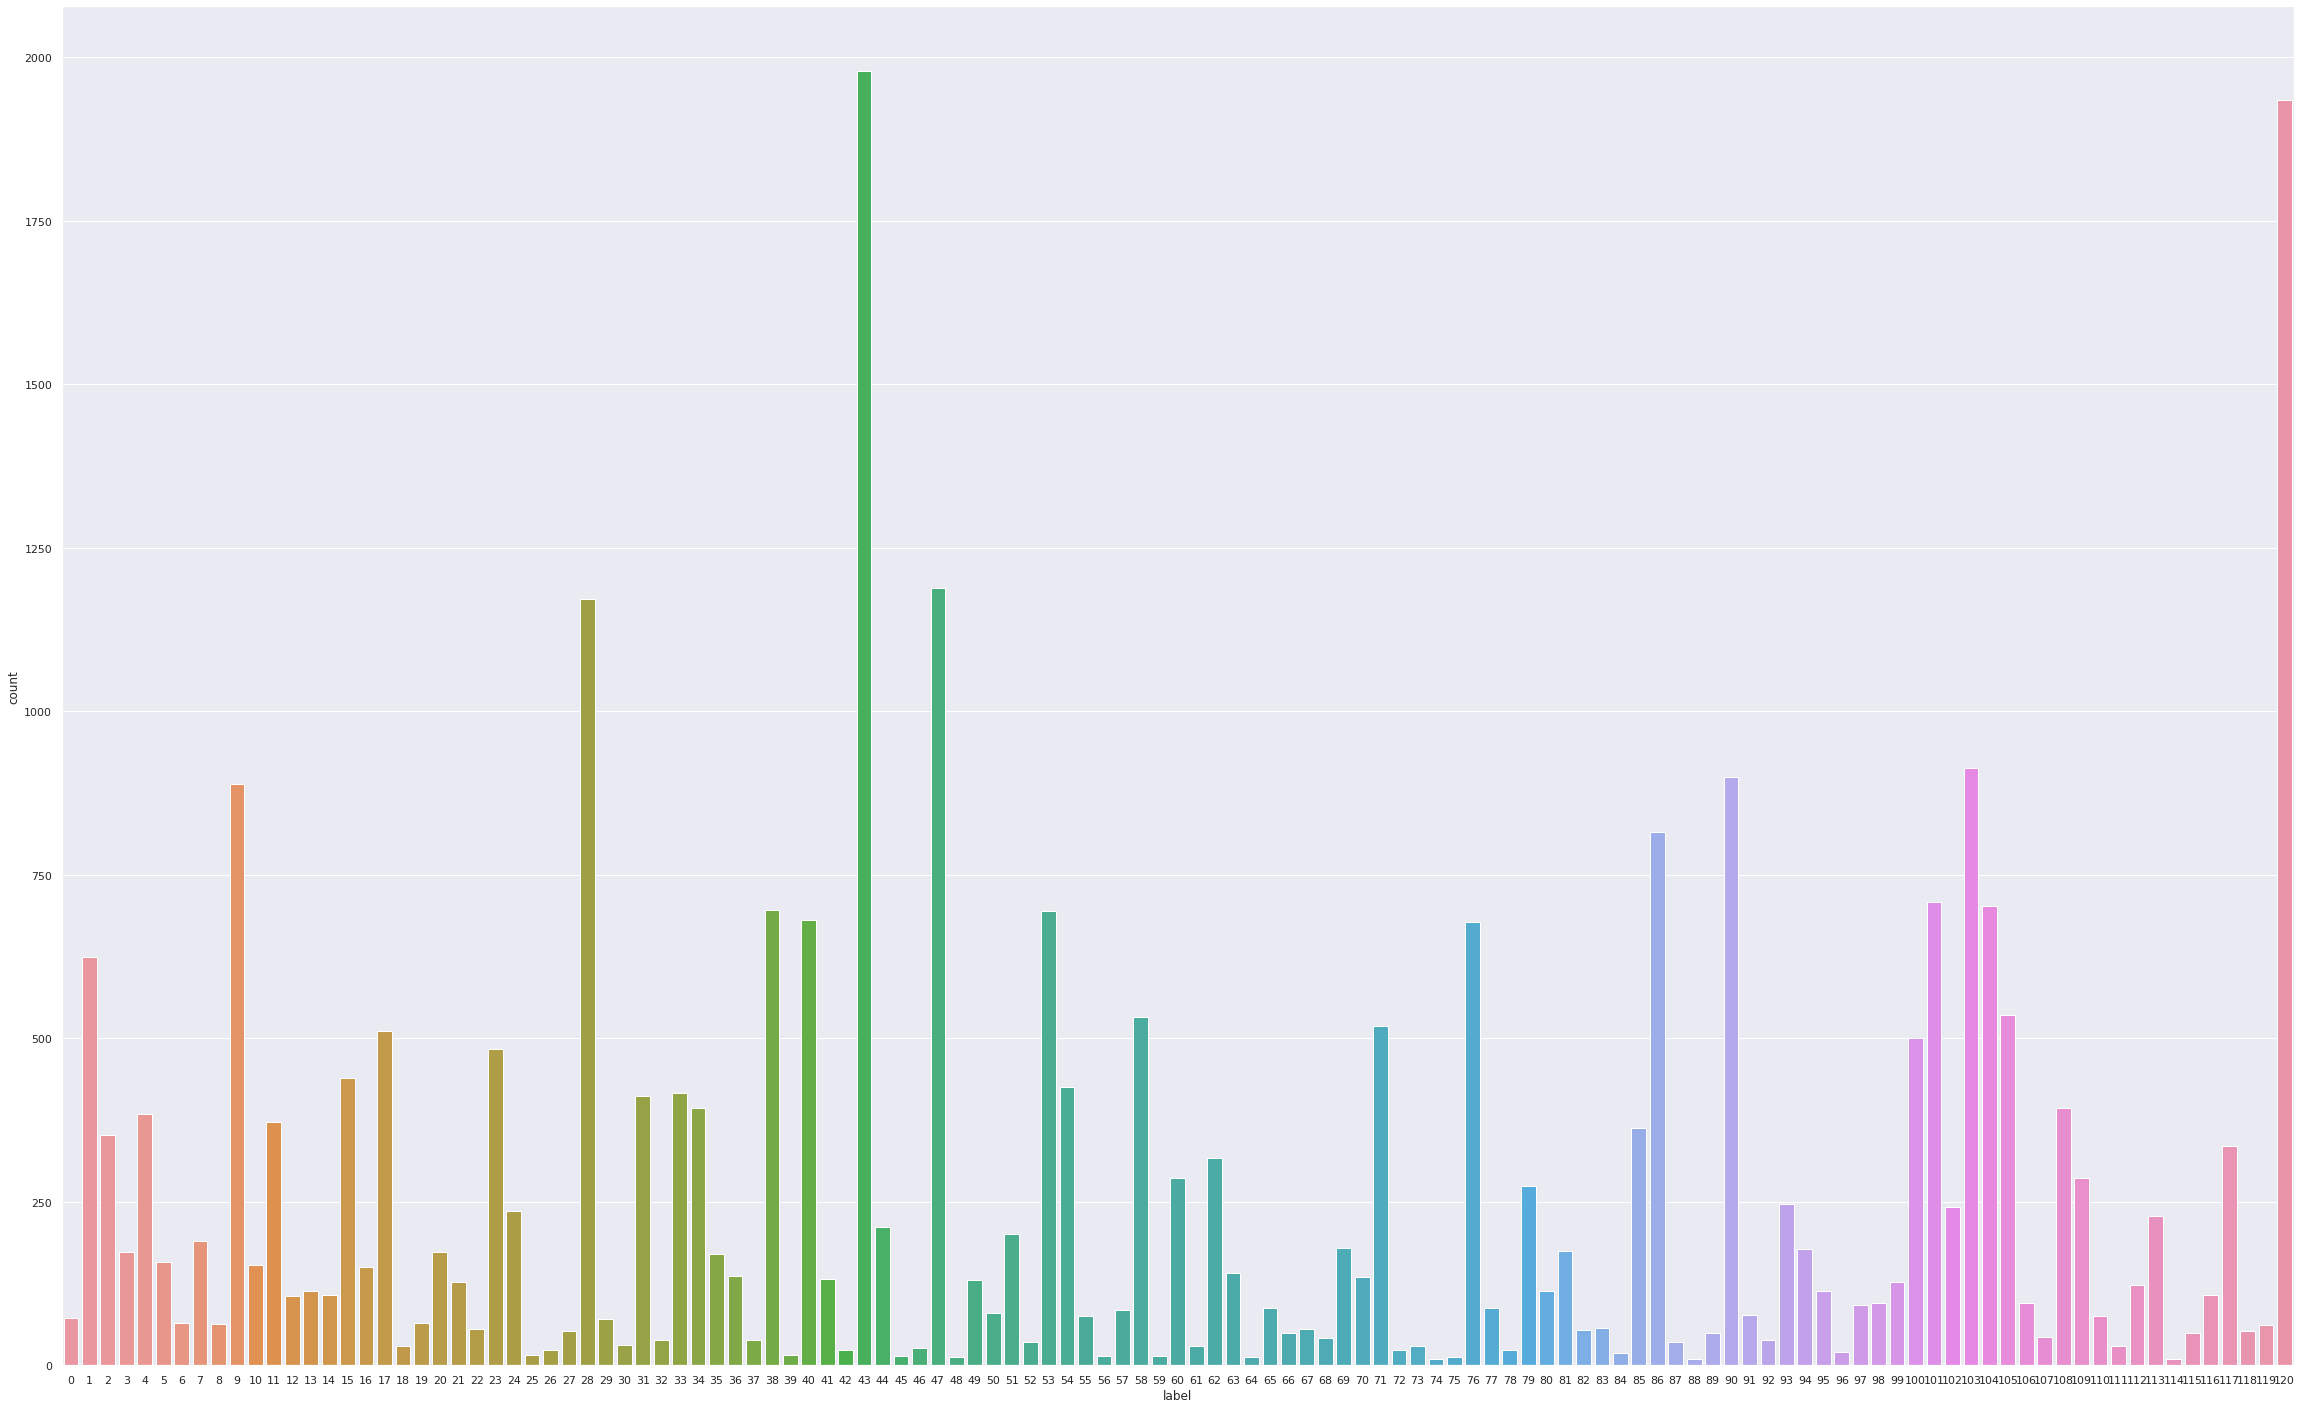

In [5]:
###Check the frequency bar plot of each Categories

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize':(40,25)})
ax1 = sns.countplot(x='label',data=train_df)

Here, we could notice that the data is pretty imbalance. Hence, we need to deal with that with the oversampling measure.

In [6]:
# Get the Big Cateogry Here
First_Category =['trichodesmium_bowtie','trichodesmium_multiple','trichodesmium_puff','trichodesmium_tuft']
Second_Category = ['diatom_chain_string','diatom_chain_tube']
Third_Category = ['acantharia_protist','acantharia_protist_big_center',
                  'acantharia_protist_halo','protist_dark_center','protist_fuzzy_olive',
                  'protist_noctiluca','protist_other','protist_star','radiolarian_chain','radiolarian_colony']
Fourth_Category = ['fish_larvae_deep_body','fish_larvae_leptocephali','fish_larvae_medium_body',
                   'fish_larvae_myctophids','fish_larvae_thin_body','fish_larvae_very_thin_body']
Fifth_Category = ['chaetognath_non_sagitta','chaetognath_other','chaetognath_sagitta']
Six_Category = ['heteropod','pteropod_butterfly','pteropod_theco_dev_seq','pteropod_triangle']
Seven_Category = ['fecal_pellet','detritus_blob','detritus_filamentous','detritus_other']
Eight_Category = ['trochophore_larvae','invertebrate_larvae_other_A','invertebrate_larvae_other_B','tornaria_acorn_worm_larvae',
                  'echinoderm_larva_pluteus_brittlestar','echinoderm_larva_pluteus_early','echinoderm_larva_pluteus_typeC','echinoderm_larva_pluteus_urchin',
                  'echinoderm_larva_seastar_bipinnaria','echinoderm_larva_seastar_brachiolaria','echinoderm_seacucumber_auricularia_larva','echinopluteus']
Nine_Category = ['unknown_unclassified','unknown_sticks','unknown_blobs_and_smudges','polychaete','chordate_type1','artifacts_edge','artifacts']
Ten_Category = ['copepod_other','amphipods','copepod_cyclopoid_oithona_eggs','copepod_cyclopoid_oithona','copepod_cyclopoid_copilia','copepod_calanoid_small_longantennae'
,'copepod_calanoid_octomoms','copepod_calanoid_large_side_antennatucked','copepod_calanoid_large'
,'copepod_calanoid_frillyAntennae','copepod_calanoid_flatheads','copepod_calanoid_eucalanus','copepod_calanoid_eggs','copepod_calanoid','stomatopod','crustacean_other'
,'shrimp-like_other','shrimp_zoea','shrimp_sergestidae','shrimp_caridean','decapods','euphausiids_young','euphausiids']
Eleven_Category = ['ephyra','jellies_tentacles','siphonophore_physonect_young','siphonophore_physonect','siphonophore_partial','siphonophore_other_parts',
'siphonophore_calycophoran_sphaeronectes_young','siphonophore_calycophoran_sphaeronectes_stem','siphonophore_calycophoran_sphaeronectes','siphonophore_calycophoran_rocketship_young',
'siphonophore_calycophoran_rocketship_adult','siphonophore_calycophoran_abylidae','hydromedusae_typeF','hydromedusae_typeE','hydromedusae_typeD_bell_and_tentacles',
'hydromedusae_typeD','hydromedusae_solmundella','hydromedusae_solmaris','hydromedusae_sideview_big','hydromedusae_shapeB','hydromedusae_shapeA_sideview_small','hydromedusae_shapeA',
'hydromedusae_partial_dark','hydromedusae_other','hydromedusae_narcomedusae','hydromedusae_narco_young','hydromedusae_narco_dark','hydromedusae_liriope','hydromedusae_haliscera_small_sideview',
'hydromedusae_haliscera','hydromedusae_h15','hydromedusae_bell_and_tentacles','hydromedusae_aglaura','tunicate_salp_chains','tunicate_salp','tunicate_partial','tunicate_doliolid_nurse',
'tunicate_doliolid','appendicularian_straight','appendicularian_slight_curve','appendicularian_s_shape','appendicularian_fritillaridae','ctenophore_lobate','ctenophore_cydippid_tentacles','ctenophore_cydippid_no_tentacles','ctenophore_cestid']



In [7]:
train_df['big_category'] = None
### Insert the big category in the dataframe 
for i in range(len(train_df)):
  if train_df['images_category'][i] in First_Category:
    train_df['big_category'][i] = 0
  elif train_df['images_category'][i] in Second_Category:
    train_df['big_category'][i] = 1
  elif train_df['images_category'][i] in Third_Category:
    train_df['big_category'][i] = 2
  elif train_df['images_category'][i] in Fourth_Category:
    train_df['big_category'][i] = 3
  elif train_df['images_category'][i] in Fifth_Category:
    train_df['big_category'][i] = 4
  elif train_df['images_category'][i] in Six_Category:
    train_df['big_category'][i] = 5
  elif train_df['images_category'][i] in Seven_Category:
    train_df['big_category'][i] = 6
  elif train_df['images_category'][i] in Eight_Category:
    train_df['big_category'][i] = 7
  elif train_df['images_category'][i] in Nine_Category:
    train_df['big_category'][i] = 8
  elif train_df['images_category'][i] in Ten_Category:
    train_df['big_category'][i] = 9
  elif train_df['images_category'][i] in Eleven_Category:
    train_df['big_category'][i] = 10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarn

In [8]:
train_df

,filename,images_category,label,big_category
0,52181.jpg,tunicate_salp_chains,0,10
1,154438.jpg,tunicate_salp_chains,0,10
2,147455.jpg,tunicate_salp_chains,0,10
3,58039.jpg,tunicate_salp_chains,0,10
4,46850.jpg,tunicate_salp_chains,0,10
...,...,...,...,...
30331,48392.jpg,chaetognath_other,120,4
30332,133771.jpg,chaetognath_other,120,4
30333,84020.jpg,chaetognath_other,120,4
30334,55337.jpg,chaetognath_other,120,4


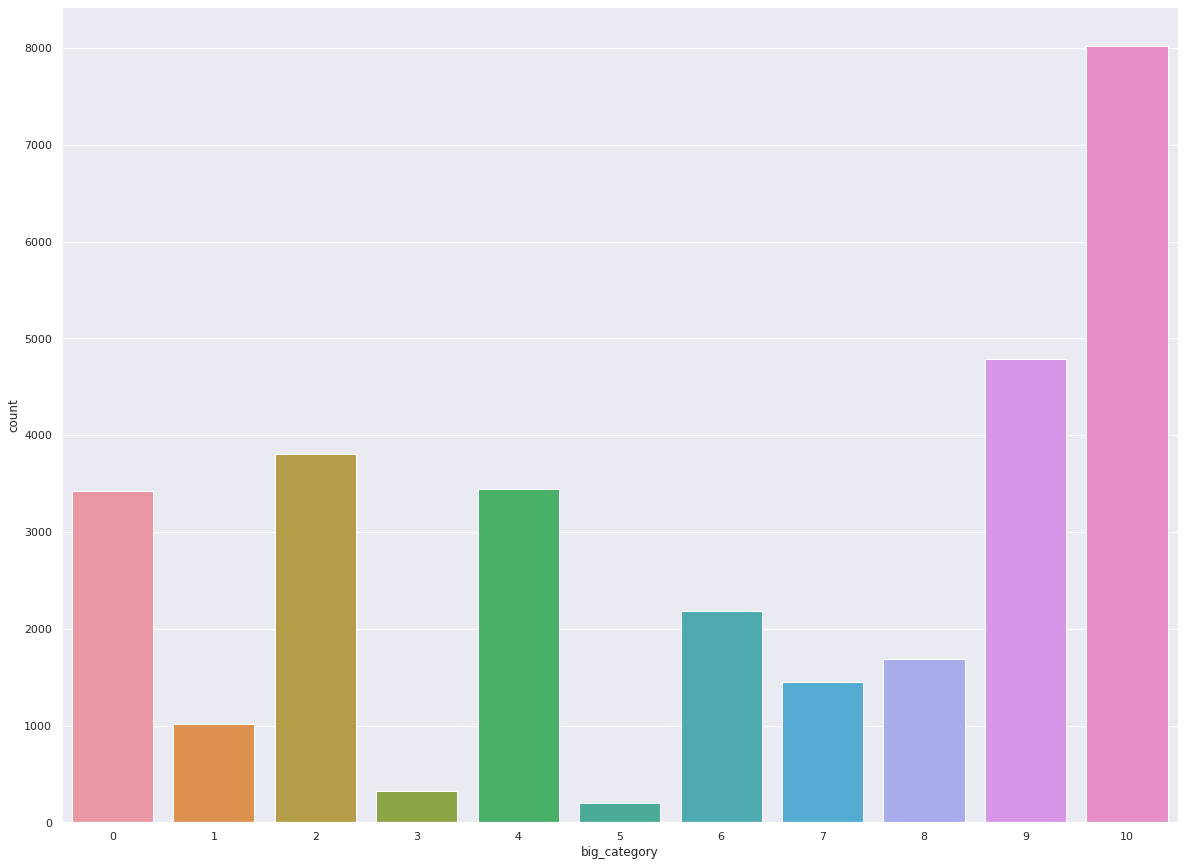

In [9]:
## Check the frequency bar plot of the Big Category
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize':(20,15)})
ax2 = sns.countplot(x='big_category',data=train_df)

In [10]:
### randomly choose 0.8 data from each category to be the new train set
import math
import numpy as np

np.random.seed(0)
all_train_idxs = []
for i in range(121):
  indexes = train_df[train_df['label']==i].index.tolist()
  train_index = np.random.choice(indexes, math.ceil(len(indexes)*0.8),replace=False)
  globals()['train_cat'+str(i)] = train_df.iloc[train_index]
  all_train_idxs.append(globals()['train_cat'+str(i)])

new_train = pd.concat(all_train_idxs)
new_train = new_train.reset_index()
new_train = new_train.drop(columns = ['index'])
new_train

,filename,images_category,label,big_category
0,53619.jpg,tunicate_salp_chains,0,10
1,106227.jpg,tunicate_salp_chains,0,10
2,91050.jpg,tunicate_salp_chains,0,10
3,111699.jpg,tunicate_salp_chains,0,10
4,51307.jpg,tunicate_salp_chains,0,10
...,...,...,...,...
24317,96812.jpg,chaetognath_other,120,4
24318,98456.jpg,chaetognath_other,120,4
24319,37760.jpg,chaetognath_other,120,4
24320,117282.jpg,chaetognath_other,120,4


In [33]:
### get the rest of the data from the original trainset as the validation set
new_valid = pd.DataFrame(columns = {'filename','images_category','label'})

for i in range(len(train_df)):
  if train_df["filename"][i] not in new_train["filename"].to_list():
    new_valid = new_valid.append(train_df.iloc[i])

new_valid = new_valid[['filename','images_category','label','big_category']] # through the process of appending the order of the columns change
new_valid = new_valid.reset_index()
new_valid = new_valid.drop(columns = ['index'])
new_valid

,filename,images_category,label,big_category
0,154438.jpg,tunicate_salp_chains,0,10.0
1,40852.jpg,tunicate_salp_chains,0,10.0
2,116441.jpg,tunicate_salp_chains,0,10.0
3,128393.jpg,tunicate_salp_chains,0,10.0
4,150986.jpg,tunicate_salp_chains,0,10.0
...,...,...,...,...
6009,73151.jpg,chaetognath_other,120,4.0
6010,105964.jpg,chaetognath_other,120,4.0
6011,45076.jpg,chaetognath_other,120,4.0
6012,80582.jpg,chaetognath_other,120,4.0


### Do Preprocessed for train set - Edge Enhance More



In [21]:
import os
### Create a file to store the preprocessed train set
os.makedirs('/content/drive/MyDrive/110_1/DeepLearning/Final/train_set', exist_ok=True)
os.makedirs('/content/drive/MyDrive/110_1/DeepLearning/Final/valid_set', exist_ok=True)

In [22]:
train_preprocessed ='/content/train/'
trainset = '/content/Final/train_set'
validset = '/content/Final/valid_set'

In [32]:
%time
from PIL import Image, ImageFilter
import shutil
import os

train_cnt = 0
val_cnt =0

for base, dirs, files in os.walk(train_preprocessed):
    for Files in files:
       im = Image.open(os.path.join(base,Files))
       im = im.filter(ImageFilter.EDGE_ENHANCE_MORE)
       if Files in new_train['filename'].to_list():
         im.save(os.path.join(trainset,Files))
         train_cnt +=1
       elif Files in new_valid['filename'].to_list():
         im.save(os.path.join(validset,Files))
         val_cnt +=1
print(train_cnt)
print(val_cnt)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs
24322
6014


### ZIP compressed

In [34]:
import zipfile
zf = zipfile.ZipFile('{}.zip'.format(trainset), 'w', zipfile.ZIP_DEFLATED)
   
for root, dirs, files in os.walk(trainset):
    for file_name in files:
        zf.write(os.path.join(root, file_name))



In [43]:
cnt = 0
for root, dirs, files in os.walk(validset):
    for file_name in files:
        cnt +=1
print(cnt)

6014


In [35]:
import zipfile
zf2 = zipfile.ZipFile('{}.zip'.format(validset), 'w', zipfile.ZIP_DEFLATED)
   
for root, dirs, files in os.walk(validset):
    for file_name in files:
        zf2.write(os.path.join(root, file_name))



## Test Set

In [12]:
!unzip -qq "/content/test.zip"

In [13]:
##Create DataFame for the Test Data
import os

images_indx = []

for root, dirs, files in os.walk('/content/test/'):
  for name in files:
    images_indx.append(name)


import pandas as pd

test_df = pd.DataFrame({'filename':images_indx})
test_df

,filename
0,20222.jpg
1,128118.jpg
2,59053.jpg
3,9815.jpg
4,50289.jpg
...,...
130395,138187.jpg
130396,42160.jpg
130397,16839.jpg
130398,132375.jpg
